# JupyerLab notebook example for BordetBeam-like simulations

## Module imports

In [1]:
# External modules (to "pip install")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.optimize import curve_fit
# Modules from Standard lib
from pathlib import Path

# RadioBio module
import radiopyo as rp

## Simulation Run

**1) Load configuration from the toml file +**  
 -> create a ref to O2 species for later use  
 -> define the desired number of pulses  
 -> define the period

In [2]:
file = Path(rf"configuration_Bordet.toml")
uc = rp.UnitCell.from_toml(file)
uc.set_beam("UHDR")
O2 = uc.env.species.get("O2")

PERIOD = 1500 # seconds


res = uc.prepare_chunked_run([1e-9, PERIOD],
                             max_step_size_on=1e-4,
                             max_step_size_off=0.5).run()


df = res.to_pandas()




2024-03-21 17:12:05,591::radiopyo::INFO::Loading config from file: configuration_Bordet.toml
2024-03-21 17:12:05,599::radiopyo::INFO::Resolving include: C:\Users\daraa\Dev\radiopyo\radiopyo\radiopyo\data\config_Labarbe.toml
2024-03-21 17:12:05,604::radiopyo::INFO::Resolving include: C:\Users\daraa\Dev\radiopyo\radiopyo\radiopyo\data\basic_water_radiolysis.toml
2024-03-21 17:12:05,790::radiopyo::INFO::Resolving include: C:\Users\daraa\Dev\radiopyo\radiopyo\radiopyo\data\reactions_biology.toml
2024-03-21 17:12:05,837::radiopyo::WARNING::Unable to compute mass of GSH. Setting it to default mass, i.e. 0
2024-03-21 17:12:06,203::radiopyo::WARNING::Unable to compute mass of GSH. Setting it to default mass, i.e. 0
2024-03-21 17:12:06,405::radiopyo::INFO::File is loaded
2024-03-21 17:12:06,406::radiopyo::INFO::Beam configuration detected in config file
2024-03-21 17:12:06,406::radiopyo::INFO::BEAM:: Found beam 'conv' as pulsed -> {'dose_rate': 0.1, 'period': 0.03333333333333333, 'on_time': 1.2

  0%|          | 0/36 [00:00<?, ?it/s]

2024-03-21 17:12:11,330::radiopyo::INFO::Simulation done!


In [3]:
uc.beam_list.current 

PulsedBeam(dose_rate=100, timer=Timer(period=0.011111111111111112, on_time=2e-06, start_time=0.0), max_dose=19.19, label='default', time_at_max_dose=0.18888943088888888, dose_per_pulse=1.1111111111111112, peak_dose_rate=555555.5555555556)

0.0013288504720789045

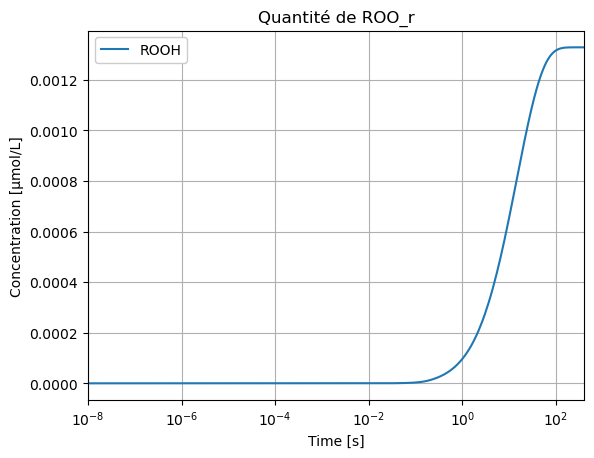

In [4]:
G_species = ["ROOH"]
fig, ax = plt.subplots()
for label in G_species:
    ax.plot(df.index, df[label], label=label, marker="")


ax.set_xlim([1e-8,400])

ax.set_xscale("log")
#ax.set_yscale("log")
ax.set_xlabel("Time [s]")
ax.set_ylabel("Concentration [µmol/L]")
ax.legend(fancybox=True, framealpha=1)
ax.set_title("Quantité de ROO_r")
ax.grid()

df['ROOH'].iloc[-1]

In [66]:
#Dose NINA UHDR
ROOH_x = [2.3,5.4,7,9.1,10.3,11.3,15.2,17.6,19.9]
ROOH_y = [0.000287,0.000577,0.000699,0.000840,0.000912,0.0009689,0.00116,0.001265,0.001355]

ROOH_low = 0.000134
ROOH_high = 0.00396

In [ ]:
#Dose NINA CONV
ROOH_x = [1.654,2,3.574,5,7.216,8,10.398,14.878,18.419]
ROOH_y = [0.000219,0.000273,0.000441,0.000671,0.000831,0.001068,0.00116, 0.00162,0.00199]

ROOH_low = 0.000134
ROOH_high = 0.00396

[0.02221641 0.08024046 0.18217459 0.26816519 0.38839519 0.48510193]
[0.03998955 0.11578672 0.14767381 0.18452692 0.20334553 0.21821746
 0.26816519 0.29560899 0.31913225]


(0.0, 1.2)

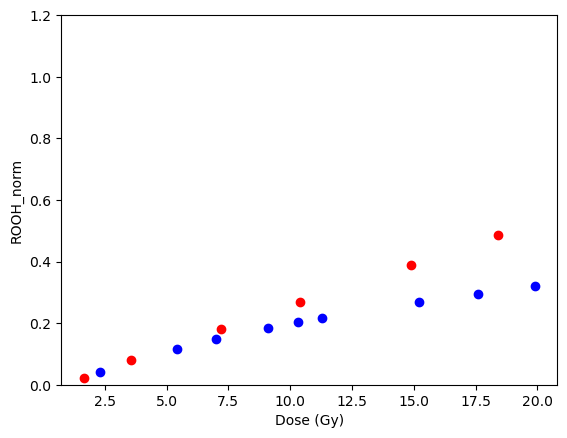

In [67]:
#Dose NINA CONV
ROOH_x = [1.654,3.574,7.216,10.398,14.878,18.419]
ROOH_y = [0.000219,0.000441,0.000831,0.00116, 0.00162,0.00199]

ROOH_low = 0.000134
ROOH_high = 0.00396 
x = ROOH_x
#Y axis is the normalised area-under-the-curve (AUC)
y = ROOH_y
#high and low are the value for the normalisation


y_norm = []
 
for val in y:
    y_norm.append((val - ROOH_low)/(ROOH_high - ROOH_low))
y_norm    
x = np.asarray(x)
y_norm = np.asarray(y_norm)
print(y_norm)


plt.xlabel("Dose (Gy)")
plt.ylabel("ROOH_norm")
plt.plot(x, y_norm, 'o', label='data',c = "red")
plt.ylim(0,1.2)
#Dose NINA UHDR
ROOH_x = [2.3,5.4,7,9.1,10.3,11.3,15.2,17.6,19.9]
ROOH_y = [0.000287,0.000577,0.000699,0.000840,0.000912,0.0009689,0.00116,0.001265,0.001355]

[2.3,5.4,7,9.1,10.3,11.3,15.2,17.6,19.9]
ROOH_low = 0.000134
ROOH_high = 0.00396 
x = ROOH_x
#Y axis is the normalised area-under-the-curve (AUC)
y = ROOH_y
#high and low are the value for the normalisation


y_norm = []
 
for val in y:
    y_norm.append((val - ROOH_low)/(ROOH_high - ROOH_low))
y_norm    
x = np.asarray(x)
y_norm = np.asarray(y_norm)
print(y_norm)


plt.xlabel("Dose (Gy)")
plt.ylabel("ROOH_norm")
plt.plot(x, y_norm, 'o', label='data',c = "blue")
plt.ylim(0,1.2)

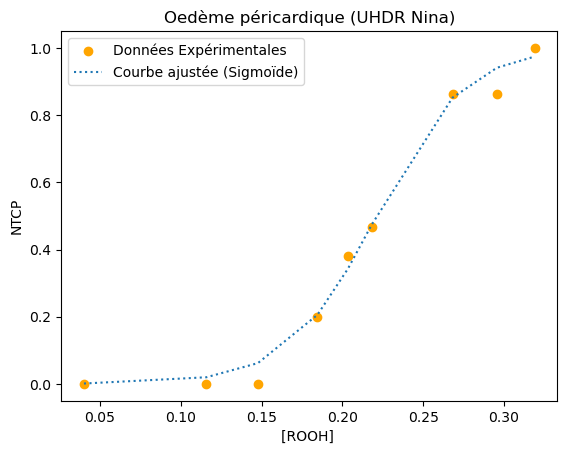

Paramètre delta ajusté : 37.09005473511736
Paramètre ROOH0 ajusté : 0.22095720633820595


In [68]:
import numpy as np

import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

# Définir la fonction sigmoïde avec des noms de paramètres modifiés
def sigmoid(x, delta, ROOH50):
    return 1 / (1 + np.exp(-delta * (x - ROOH50)))
# Générer des données expérimentales simulées



#x_data = np.array([0,1.654,3.574,7.216,10.398,14.878,18.419])
#y_data = np.array([0, 0.017, 0.016, 0.446, 0.7959999999999999, 0.95, 1.0])

x_data = np.array([0.03998955, 0.11578672, 0.14767381, 0.18452692, 0.20334553, 0.21821746, 0.26816519, 0.29560899 ,0.31913225])
y_data = np.array([0,0,0,0.2,0.382,0.467,0.864,0.864,1])




# Ajuster la courbe sigmoïde aux données expérimentales
params, covariance = curve_fit(sigmoid, x_data, y_data)

# Obtenir les paramètres ajustés
delta_fit, ROOH50_fit = params

# Générer des valeurs prédites avec les paramètres ajustés
y_fit = sigmoid(x_data, delta_fit, ROOH50_fit)

# Tracer les données expérimentales et la courbe ajustée
plt.scatter(x_data, y_data, label='Données Expérimentales',c = 'orange')
plt.plot(x_data, y_fit, label='Courbe ajustée (Sigmoïde)',linestyle=":")
plt.legend()

 
plt.title("Oedème péricardique (UHDR Nina)")
plt.xlabel("[ROOH] ")
plt.ylabel("NTCP")

# Afficher le graphique
plt.show()

 
# Afficher les paramètres ajustés
print(f"Paramètre delta ajusté : {delta_fit}")
print(f"Paramètre ROOH0 ajusté : {ROOH50_fit}")

[0.02221641 0.08024046 0.18217459 0.26816519 0.38839519 0.48510193]
0.0217939018947759
0.07238662266830363
0.4137450561201315
0.8189358995900236
0.9838012550879474
0.9979658707685232
[0.03998955 0.11578672 0.14767381 0.18452692 0.20334553 0.21821746
 0.26816519 0.29560899 0.31913225]
0.0012146299402901648
0.019825162350667204
0.0619145895804371
0.2056740474721062
0.3422647312034794
0.47461749790980423
0.8520721477671569
0.9409685177264602
0.97445204054235
0.0012482147412816304
0.020168734635197846
0.06270081396419025
0.20595372003874576
0.3423321104022839
0.4731362761322268
0.8537177480239515
0.940408720568164
0.974060957870929
0.0065483014616466865
0.010652833796005814
0.01361951247420291
0.02682123343191518
0.03874455887865022
0.05041493977152877
0.09090717262581736
0.15694430352391436
0.25452538852225026
0.28020825960715795
0.3161431971910932
0.3860697360099069
0.460362385515534
0.5358727961763661
0.6097373533498774
0.6787367589096822
0.7284299896213312
0.7403787034843103
0.79396226

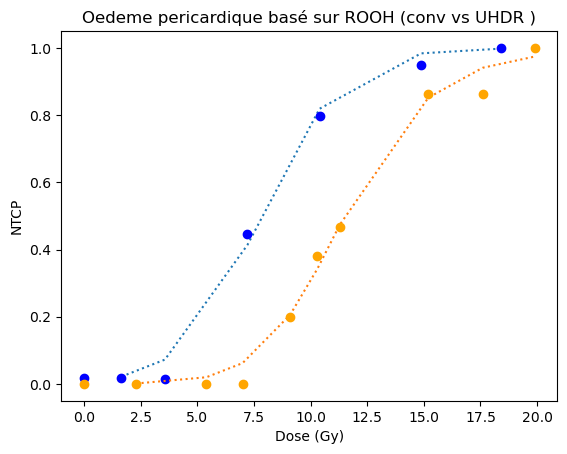

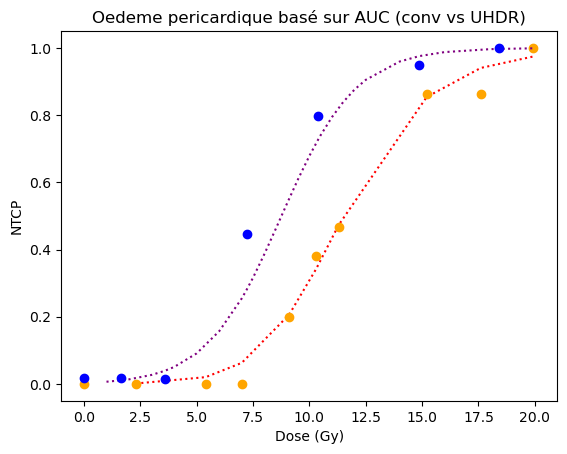

In [98]:

ROOH_low = 0.000134
ROOH_high = 0.00396 

ROOH50 = 0.19830679342043764
delta = 21.603055168317507


#Dose NINA CONV
ROOH_x = [1.654,3.574,7.216,10.398,14.878,18.419]
ROOH_y = [0.000219,0.000441,0.000831,0.00116, 0.00162,0.00199]


x = ROOH_x
#Y axis is the normalised area-under-the-curve (AUC)
y = ROOH_y
#high and low are the value for the normalisation


y_norm = []
 
for val in y:
    y_norm.append((val - ROOH_low)/(ROOH_high - ROOH_low))
y_norm    
x = np.asarray(x)
y_norm = np.asarray(y_norm)
print(y_norm)

NTCP_model = []
for i in range (len(ROOH_x)):
    NTCP = 1/(1 + np.exp(-delta * (y_norm[i] - ROOH50)))
    NTCP_model.append(NTCP)
    print(NTCP)
    
f1 = plt.figure(1)
plt.plot(x, NTCP_model, label='data',linestyle=":")  
    

c = [0,1.654,3.574,7.216,10.398,14.878,18.419]
d = [0.017, 0.017, 0.016, 0.446, 0.7959999999999999, 0.95, 1.0]
plt.plot(c, d, 'o', label='Nina point',c = 'blue') 
    

plt.title("Oedeme pericardique basé sur ROOH (conv vs UHDR )")
plt.xlabel("Dose (Gy)")
plt.ylabel("NTCP")

ROOH50 = 0.22095720633820595
delta =  37.09005473511736


#Dose NINA UHDR
ROOH_x = [2.3,5.4,7,9.1,10.3,11.3,15.2,17.6,19.9]
ROOH_y = [0.000287,0.000577,0.000699,0.000840,0.000912,0.0009689,0.00116,0.001265,0.001355]

x = ROOH_x
#Y axis is the normalised area-under-the-curve (AUC)
y = ROOH_y
#high and low are the value for the normalisation


y_norm = []
 
for val in y:
    y_norm.append((val - ROOH_low)/(ROOH_high - ROOH_low))
y_norm    
x = np.asarray(x)
y_norm = np.asarray(y_norm)
print(y_norm)

NTCP_model = []
for i in range (len(ROOH_x)):
    NTCP = 1/(1 + np.exp(-delta * (y_norm[i] - ROOH50)))
    NTCP_model.append(NTCP)
    print(NTCP)

plt.plot(x, NTCP_model, label='data',linestyle=":")  
e = [0,2.3,5.4,7.0,9.1,10.3,11.3,15.2,17.6,19.9]
f = [0,0,0,0,0.20,0.382,0.467,0.864,0.864,1]
plt.plot(e, f, 'o',c = 'orange')  





f2 = plt.figure(2)

AUC50 = 0.225
gamma = 22.453843847070782



AUC50 = 0.22653403628949817
gamma = 36.17360772670645

# beam Nina UHDR (en fctn de la dose)
AUC_x = [2.3,5.4,7.0,9.1,10.3,11.3,15.2,17.6,19.9]
AUC_y = [14.382711627442042, 28.889977932401482, 34.99322937532645, 42.01055165665231, 45.61761420569036, 48.44165806187978, 58.13349025369999, 63.28457518377611, 67.77375102116689]
#AUC_y = [0,0,0,0,20,38.2,46.7,86.4,86.4,100]
AUC_low = 6.564700777449954
AUC_high = 193.88281400256988


# X axis is the dose or the dose rate 
x = AUC_x
#Y axis is the normalised area-under-the-curve (AUC)
y = AUC_y
#high and low are the value for the normalisation


y_norm = []
 
for val in y:
    y_norm.append((val - AUC_low)/(AUC_high - AUC_low))
y_norm    
x = np.asarray(x)
y_norm = np.asarray(y_norm)




NTCP_model = []
for i in range (len(AUC_x)):
    NTCP = 1/(1 + np.exp(-gamma * (y_norm[i] - AUC50)))
    NTCP_model.append(NTCP)
    print(NTCP)

plt.plot(x, NTCP_model, label='data',linestyle=":",c = 'red')  
    

c = [0,2.3,5.4,7.0,9.1,10.3,11.3,15.2,17.6,19.9]
d = [0,0,0,0,0.20,0.382,0.467,0.864,0.864,1]
plt.plot(c, d, 'o', label='Nina point',c = 'orange')  
 
    
AUC50 = 0.225
gamma = 22.453843847070782    
# beam Nina Conv (en fctn de la dose)
AUC_x = [1,1.654,2,3,3.574,4,5,6,7,7.216,7.5,8,8.5,9,9.5,10,10.398,10.5,11,11.5,12,12.5,14,14.878,16,18,18.419,20]
AUC_y = [6.816098878999937,10.910200131085846,12.984784700499652, 18.750731752486704,21.921864723003555, 24.22028827238765, 29.502082227249332, 34.686579339089946, 39.746402189432274, 40.84085077941589, 42.274698846291734, 44.84156004205031,47.385809471496806, 49.91039207145343, 52.433708064465264, 54.95113435122659, 56.9424483384481, 57.453553642193846, 59.96492836738948, 62.48534313114447,65.02128866724098, 67.51511488245936, 75.10009166519741, 79.51197444225598, 85.23871439074674, 95.32257517388939, 97.42373031750556, 105.33416056766724]
AUC_low = 6.564700777449954
AUC_high = 193.88281400256988    

# X axis is the dose or the dose rate 
x = AUC_x
#Y axis is the normalised area-under-the-curve (AUC)
y = AUC_y
#high and low are the value for the normalisation


y_norm = []
 
for val in y:
    y_norm.append((val - AUC_low)/(AUC_high - AUC_low))
y_norm    
x = np.asarray(x)
y_norm = np.asarray(y_norm)


NTCP_model = []
for i in range (len(AUC_x)):
    NTCP = 1/(1 + np.exp(-gamma * (y_norm[i] - AUC50)))
    NTCP_model.append(NTCP)
    print(NTCP)

plt.plot(x, NTCP_model, label='data',linestyle=":",c = 'purple')  
    
e = [0,1.654,3.574,7.216,10.398,14.878,18.419]
f = [0.017, 0.017, 0.016, 0.446, 0.7959999999999999, 0.95, 1.0]
plt.plot(e, f, 'o',c = 'blue')  

    

plt.title("Oedeme pericardique basé sur AUC (conv vs UHDR)")
plt.xlabel("Dose (Gy)")
plt.ylabel("NTCP")
plt.show()

In [194]:
ser = df_conv["ROO_r"].to_numpy()
print("AUC in conv =",integrate.simpson(ser, df_conv.index))

ser = df_UHDR["ROO_r"].to_numpy()
print("AUC in UHDR =",integrate.simpson(ser, df_UHDR.index))

ser = df_UHDR1["ROO_r"].to_numpy()
print("AUC in UHDR1 =",integrate.simpson(ser, df_UHDR1.index))

ser = df_UHDR2["ROO_r"].to_numpy()
print("AUC in UHDR2 =",integrate.simpson(ser, df_UHDR2.index))

ser = df_UHDR3["ROO_r"].to_numpy()
print("AUC in UHDR3 =",integrate.simpson(ser, df_UHDR3.index))

AUC in conv = 54.97705785871359
AUC in UHDR = 44.744403781196915
AUC in UHDR1 = 45.50218493033962
AUC in UHDR2 = 46.256283483413604
AUC in UHDR3 = 47.91964119559733


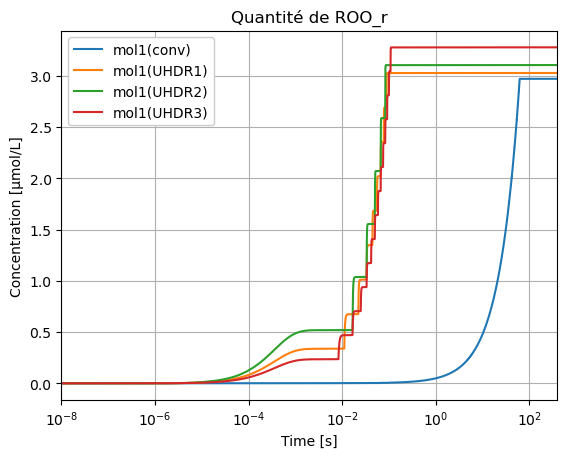

In [235]:
G_species = ["mol1"]
fig, ax = plt.subplots()
for label in G_species:
    ax.plot(df_conv.index, df_conv[label], label=label + "(conv)", marker="")
for label in G_species:
    ax.plot(df_UHDR1.index, df_UHDR1[label], label=label + "(UHDR1)", marker="")
for label in G_species:
    ax.plot(df_UHDR2.index, df_UHDR2[label], label=label + "(UHDR2)", marker="")
for label in G_species:
    ax.plot(df_UHDR3.index, df_UHDR3[label], label=label + "(UHDR3)", marker="")


ax.set_xlim([1e-8,400])

ax.set_xscale("log")
#ax.set_yscale("log")
ax.set_xlabel("Time [s]")
ax.set_ylabel("Concentration [µmol/L]")
ax.legend(fancybox=True, framealpha=1)
ax.set_title("Quantité de ROO_r")
ax.grid()

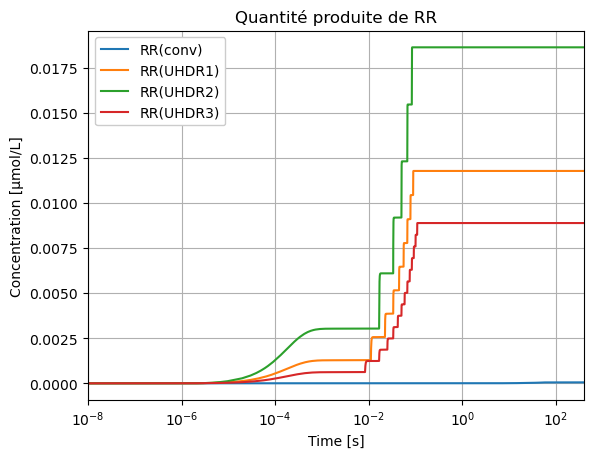

In [221]:
G_species = ["RR"]
fig, ax = plt.subplots()
for label in G_species:
    ax.plot(df_conv.index, df_conv[label], label=label + "(conv)", marker="")
for label in G_species:
    ax.plot(df_UHDR1.index, df_UHDR1[label], label=label + "(UHDR1)", marker="")
for label in G_species:
    ax.plot(df_UHDR2.index, df_UHDR2[label], label=label + "(UHDR2)", marker="")
for label in G_species:
    ax.plot(df_UHDR3.index, df_UHDR3[label], label=label + "(UHDR3)", marker="")


ax.set_xlim([1e-8,400])
ax.set_xscale("log")
#ax.set_yscale("log")
ax.set_xlabel("Time [s]")
ax.set_ylabel("Concentration [µmol/L]")
ax.legend(fancybox=True, framealpha=1)
ax.set_title("Quantité produite de RR")
ax.grid()

In [159]:
#Beam Nina UHDR3
AUC_x = [1.58,3.16,4.75,6.33,7.92,9.50,11.08,12.67,14.25,15.84,17.42,19]
AUC_y = [10.35,19.11,26.22,32.59,38.24,43.31,47.91,52.13,56.02,59.63,63,66.17]

0.0065483014616466865
0.010652833796005814
0.01361951247420291
0.02682123343191518
0.03874455887865022
0.05041493977152877
0.09090717262581736
0.15694430352391436
0.25452538852225026
0.28020825960715795
0.3161431971910932
0.3860697360099069
0.460362385515534
0.5358727961763661
0.6097373533498774
0.6787367589096822
0.7284299896213312
0.7403787034843103
0.7939622607801182
0.8390395262167597
0.8759998419276498
0.9049965827990251
0.959426880804391
0.9756858754274259
0.9876118357934853
0.9962688541870752
0.9970971855871432
0.9988733638539435
0.007309590335412924
0.015852013389389127
0.05769672960658521
0.15260738194716844
0.3147273599886472
0.49996175384842517
0.6686943887651812
0.7909076676331196
0.8698675685186427
0.9183415927036263
0.011183198071563158
0.033025436110802754
0.16279479030444127
0.4267720396522538
0.6903547027189394
0.8492043290048619
0.9264028276722014
0.00996786867688504
0.02796852539966232
0.06320791220961476
0.12647862870469265
0.221802484290675
0.3435640412655413
0.476

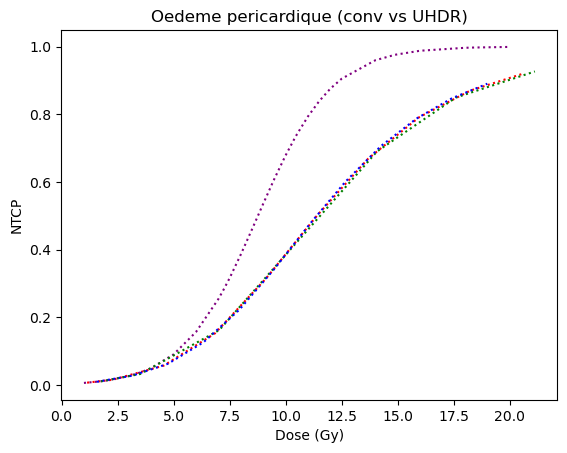

In [167]:
AUC50 = 0.225
gamma = 22.453843847070782


#AUC50 = 0.22653403628949817
#gamma = 36.17360772670645

AUC_low = 6.564700777449954
AUC_high = 193.88281400256988
    
  
 
    
    
# beam Nina Conv (en fctn de la dose)
AUC_x = [1,1.654,2,3,3.574,4,5,6,7,7.216,7.5,8,8.5,9,9.5,10,10.398,10.5,11,11.5,12,12.5,14,14.878,16,18,18.419,20]
AUC_y = [6.816098878999937,10.910200131085846,12.984784700499652, 18.750731752486704,21.921864723003555, 24.22028827238765, 29.502082227249332, 34.686579339089946, 39.746402189432274, 40.84085077941589, 42.274698846291734, 44.84156004205031,47.385809471496806, 49.91039207145343, 52.433708064465264, 54.95113435122659, 56.9424483384481, 57.453553642193846, 59.96492836738948, 62.48534313114447,65.02128866724098, 67.51511488245936, 75.10009166519741, 79.51197444225598, 85.23871439074674, 95.32257517388939, 97.42373031750556, 105.33416056766724]
    

# X axis is the dose or the dose rate 
x = AUC_x
#Y axis is the normalised area-under-the-curve (AUC)
y = AUC_y
#high and low are the value for the normalisation


y_norm = []
 
for val in y:
    y_norm.append((val - AUC_low)/(AUC_high - AUC_low))
y_norm    
x = np.asarray(x)
y_norm = np.asarray(y_norm)


NTCP_model = []
for i in range (len(AUC_x)):
    NTCP = 1/(1 + np.exp(-gamma * (y_norm[i] - AUC50)))
    NTCP_model.append(NTCP)
    print(NTCP)

plt.plot(x, NTCP_model, label='data',linestyle=":",c = 'purple')  
    


    

plt.title("Oedeme pericardique (conv vs UHDR)")
plt.xlabel("Dose (Gy)")
plt.ylabel("NTCP")

#Beam Nina UHDR1 
AUC_x = [1.14,2.28,4.56,6.84,9.12,11.39,13.68,15.95,18.24,20.52]
AUC_y = [7.74,14.27,25.41,34.41,42.22,48.71,54.57,59.81,64.56,68.90]


x = AUC_x
#Y axis is the normalised area-under-the-curve (AUC)
y = AUC_y
#high and low are the value for the normalisation




y_norm = []
 
for val in y:
    y_norm.append((val - AUC_low)/(AUC_high - AUC_low))
y_norm    
x = np.asarray(x)
y_norm = np.asarray(y_norm)


NTCP_model = []
for i in range (len(AUC_x)):
    NTCP = 1/(1 + np.exp(-gamma * (y_norm[i] - AUC50)))
    NTCP_model.append(NTCP)
    print(NTCP)
plt.plot(x, NTCP_model, label='data',linestyle=":",c = 'red')  


#Beam Nina UHDR2
AUC_x = [1.76,3.52,7.04,10.56,14.08,17.59,21.12]
AUC_y = [11.32,20.54,35.05,46.25,55.40,63.13,69.84]

x = AUC_x
#Y axis is the normalised area-under-the-curve (AUC)
y = AUC_y
#high and low are the value for the normalisation




y_norm = []
 
for val in y:
    y_norm.append((val - AUC_low)/(AUC_high - AUC_low))
y_norm    
x = np.asarray(x)
y_norm = np.asarray(y_norm)


NTCP_model = []
for i in range (len(AUC_x)):
    NTCP = 1/(1 + np.exp(-gamma * (y_norm[i] - AUC50)))
    NTCP_model.append(NTCP)
    print(NTCP)
plt.plot(x, NTCP_model, label='data',linestyle=":",c = 'green')  


#Beam Nina UHDR3
AUC_x = [1.58,3.16,4.75,6.33,7.92,9.50,11.08,12.67,14.25,15.84,17.42,19]
AUC_y = [10.35,19.11,26.22,32.59,38.24,43.31,47.91,52.13,56.02,59.63,63,66.17]

x = AUC_x
#Y axis is the normalised area-under-the-curve (AUC)
y = AUC_y
#high and low are the value for the normalisation




y_norm = []
 
for val in y:
    y_norm.append((val - AUC_low)/(AUC_high - AUC_low))
y_norm    
x = np.asarray(x)
y_norm = np.asarray(y_norm)


NTCP_model = []
for i in range (len(AUC_x)):
    NTCP = 1/(1 + np.exp(-gamma * (y_norm[i] - AUC50)))
    NTCP_model.append(NTCP)
    print(NTCP)
plt.plot(x, NTCP_model, label='data',linestyle=":",c = 'blue') 


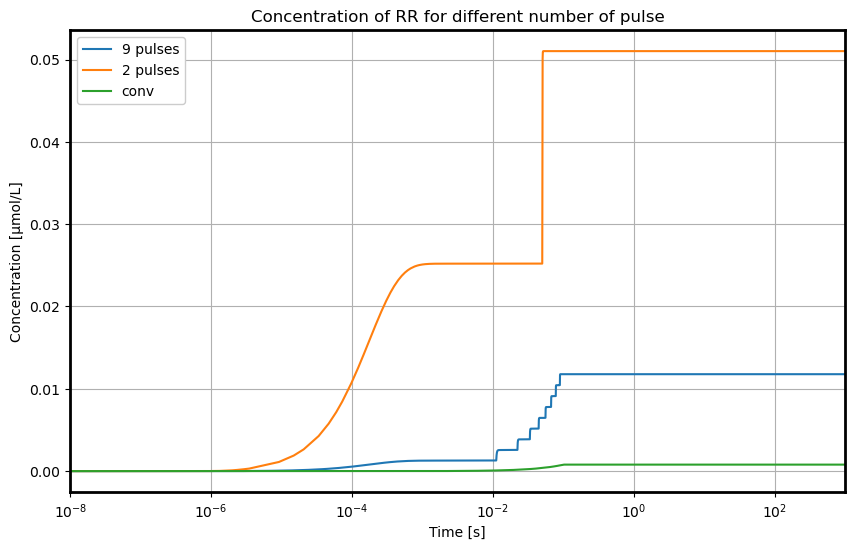

In [136]:
species = "RR"
fig, ax = plt.subplots(figsize=(10, 6))
for value, df in sims.items():
    ax.plot(df.index, df[species], label=value, marker="")
    #ax.set_ylim(bottom=1e-6, top=2)
    ax.set_xlim([1e-8, 10e2])

    #ax.set_xlim([0, 100])
ax.set_xscale("log")
#ax.set_yscale("log")
ax.spines['top'].set_linewidth(2.0)
ax.spines['right'].set_linewidth(2.0)
ax.spines['bottom'].set_linewidth(2.0)
ax.spines['left'].set_linewidth(2.0)
ax.set_xlabel("Time [s]")
ax.set_ylabel("Concentration [µmol/L]")
ax.legend(fancybox=True, framealpha=1)
    #ax.legend(fancybox=True, framealpha=1)
ax.set_title("Concentration of RR for different number of pulse")
ax.grid('on')      

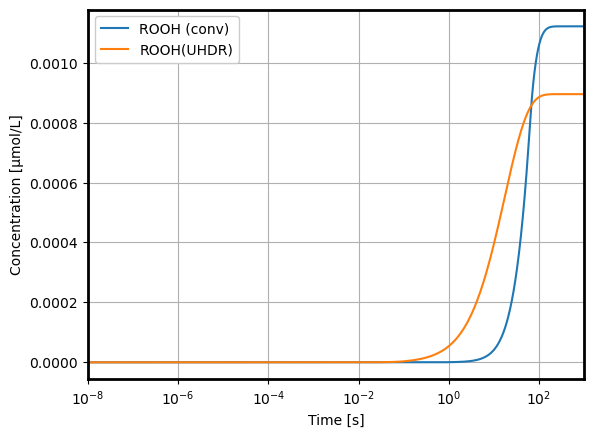

In [34]:
G_species = ["ROOH"]
fig, ax = plt.subplots()
for label in G_species:
    ax.plot(df_conv.index, df_conv[label], label=label + " (conv)", marker="")
for label in G_species:
    ax.plot(df_UHDR.index, df_UHDR[label], label=label + "(UHDR)", marker="")
    
ax.set_xscale("log")
#ax.set_yscale("log")
ax.set_xlim([1e-8, 1e3])
#ax.set_ylim([1e-8, 1e-1])
ax.spines['top'].set_linewidth(2.0)
ax.spines['right'].set_linewidth(2.0)
ax.spines['bottom'].set_linewidth(2.0)
ax.spines['left'].set_linewidth(2.0)
ax.set_xlabel("Time [s]")
ax.set_ylabel("Concentration [µmol/L]")
ax.legend(fancybox=True, framealpha=1)
    #ax.legend(fancybox=True, framealpha=1)
#ax.set_title("Concentration of R_r for different number of pulse")
ax.grid('on')      

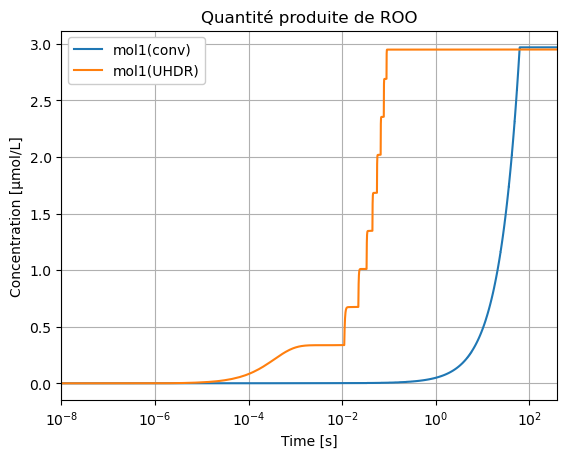

In [37]:
G_species = ["mol1"]
fig, ax = plt.subplots()
for label in G_species:
    ax.plot(df_conv.index, df_conv[label], label=label + "(conv)", marker="")
for label in G_species:
    ax.plot(df_UHDR.index, df_UHDR[label], label=label + "(UHDR)", marker="")


ax.set_xlim([1e-8,400])
ax.set_xscale("log")
#ax.set_yscale("log")
ax.set_xlabel("Time [s]")
ax.set_ylabel("Concentration [µmol/L]")
ax.legend(fancybox=True, framealpha=1)
ax.set_title("Quantité produite de ROO")
ax.grid()

In [24]:
df_conv["mol2"].iloc[-1] 

3.3349786465595197

In [26]:
df_conv["RR"].iloc[-1] + df_conv["mol1"].iloc[-1]

2.9697362883057363

In [104]:
df_conv["mol1"].iloc[-1] + df_conv["RR"].iloc[-1]

2.9697362883057363

In [37]:
(df_conv["mol1"].iloc[-1]) / df_conv["mol2"].iloc[-1] 

0.890465233837186

In [38]:
(df_UHDR["mol1"].iloc[-1]) / df_UHDR["mol2"].iloc[-1] 

1.082402586430959

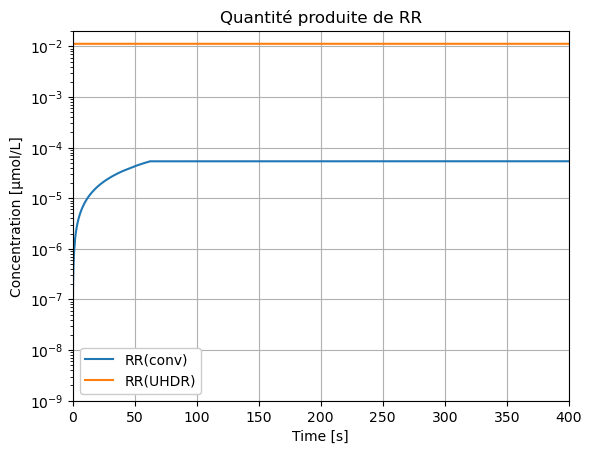

In [13]:
G_species = ["RR"]
fig, ax = plt.subplots()
for label in G_species:
    ax.plot(df_conv.index, df_conv[label], label=label + "(conv)", marker="")
for label in G_species:
    ax.plot(df_UHDR.index, df_UHDR[label], label=label + "(UHDR)", marker="")

ax.set_ylim(bottom=1e-9, top=2e-2)
ax.set_xlim([1e-9,400])
#ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("Time [s]")
ax.set_ylabel("Concentration [µmol/L]")
ax.legend(fancybox=True, framealpha=1)
ax.set_title("Quantité produite de RR")
ax.grid()

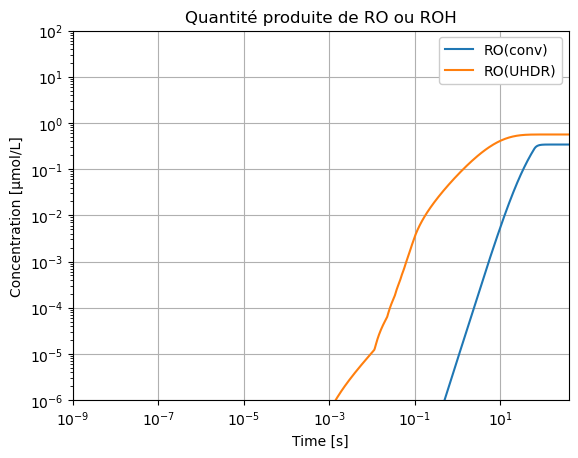

In [83]:
G_species = ["RO"]
fig, ax = plt.subplots()
for label in G_species:
    ax.plot(df_conv.index, df_conv[label], label=label + "(conv)", marker="")
for label in G_species:
    ax.plot(df_UHDR.index, df_UHDR[label], label=label + "(UHDR)", marker="")

ax.set_ylim(bottom=1e-6, top=100)
ax.set_xlim([1e-9,400])
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("Time [s]")
ax.set_ylabel("Concentration [µmol/L]")
ax.legend(fancybox=True, framealpha=1)
ax.set_title("Quantité produite de RO ou ROH")
ax.grid()

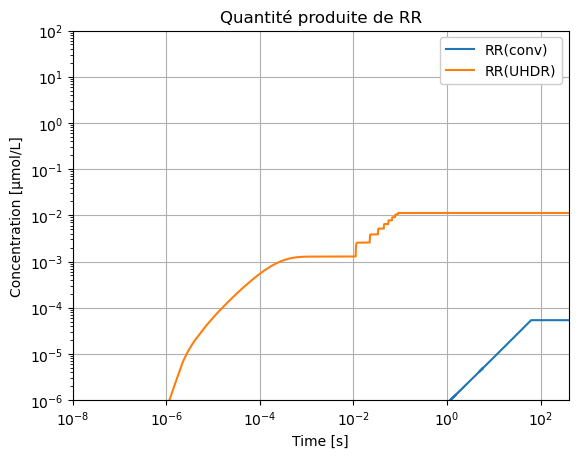

In [120]:
G_species = ["RR"]
fig, ax = plt.subplots()
for label in G_species:
    ax.plot(df_conv.index, df_conv[label], label=label + "(conv)", marker="")
for label in G_species:
    ax.plot(df_UHDR.index, df_UHDR[label], label=label + "(UHDR)", marker="")

ax.set_ylim(bottom=1e-6, top=100)
ax.set_xlim([1e-8,400])
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("Time [s]")
ax.set_ylabel("Concentration [µmol/L]")
ax.legend(fancybox=True, framealpha=1)
ax.set_title("Quantité produite de RR")
ax.grid()

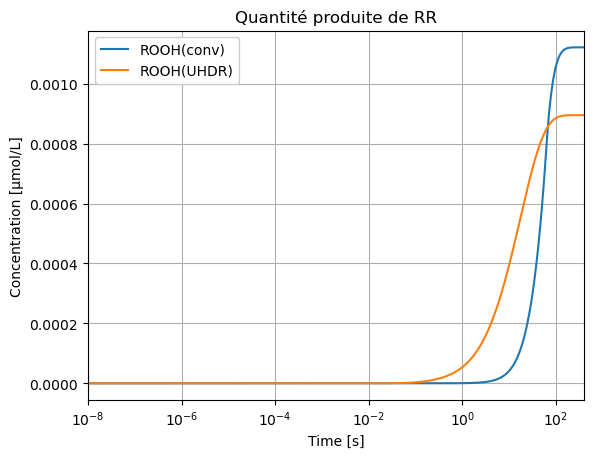

In [183]:
G_species = ["ROOH"]
fig, ax = plt.subplots()
for label in G_species:
    ax.plot(df_conv.index, df_conv[label], label=label + "(conv)", marker="")
for label in G_species:
    ax.plot(df_UHDR.index, df_UHDR[label], label=label + "(UHDR)", marker="")


ax.set_xlim([1e-8,400])
ax.set_xscale("log")
#ax.set_yscale("log")
ax.set_xlabel("Time [s]")
ax.set_ylabel("Concentration [µmol/L]")
ax.legend(fancybox=True, framealpha=1)
ax.set_title("Quantité produite de RR")
ax.grid()

In [23]:
df["RR"].iloc[-1]

5.375094005225339e-05

In [24]:
df2["RR"].iloc[-1]

0.011237785367691868

In [26]:
df2["RR"].iloc[-1]

0.011237412789609203

In [28]:
df2["RR"].iloc[-1]

5.374616727096856e-05

In [46]:
uc.beam_list.current

PulsedBeam(dose_rate=0.16, timer=Timer(period=0.03333333333333333, on_time=1.2e-06, start_time=0.0), max_dose=10, label='default', time_at_max_dose=62.46666786666667, dose_per_pulse=0.005333333333333333, peak_dose_rate=4444.444444444444)

**2) Run sim over the first pulse**

#### Water-only Radiolytic produced species

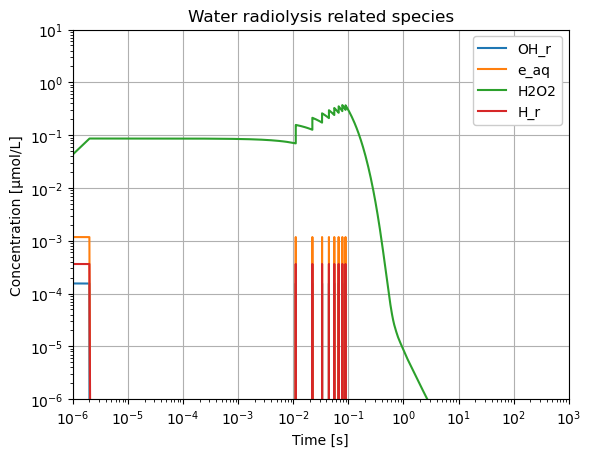

In [7]:
G_species = ["OH_r", "e_aq", "H2O2", "H_r"]
fig, ax = plt.subplots()
for label in G_species:
    ax.plot(df.index, df[label], label=label, marker="")

ax.set_ylim(bottom=1e-6, top=10)
ax.set_xlim([1e-6, 1e3])
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("Time [s]")
ax.set_ylabel("Concentration [µmol/L]")
ax.legend(fancybox=True, framealpha=1)
ax.set_title("Water radiolysis related species")
ax.grid()

#### Biology related species

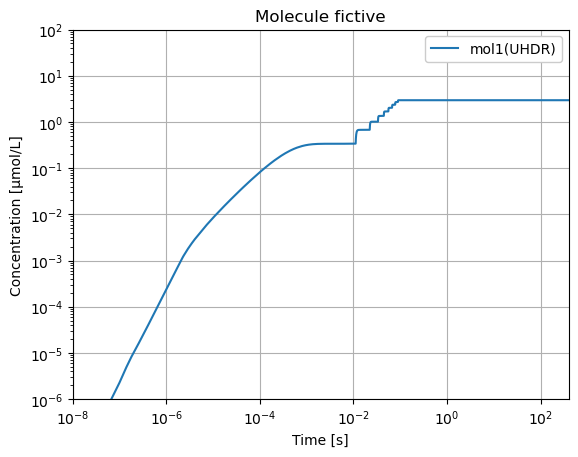

In [78]:
G_species = ["mol1"]
fig, ax = plt.subplots()
for label in G_species:
    ax.plot(df.index, df[label], label=label + "(UHDR)", marker="")


ax.set_ylim(bottom=1e-6, top=100)
ax.set_xlim([1e-8,400])
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("Time [s]")
ax.set_ylabel("Concentration [µmol/L]")
ax.legend(fancybox=True, framealpha=1)
ax.set_title("Molecule fictive")
ax.grid()

In [44]:
df["mol1"].iloc[-1] # Quantité de ROO_r en UHDR

2.950304295157516

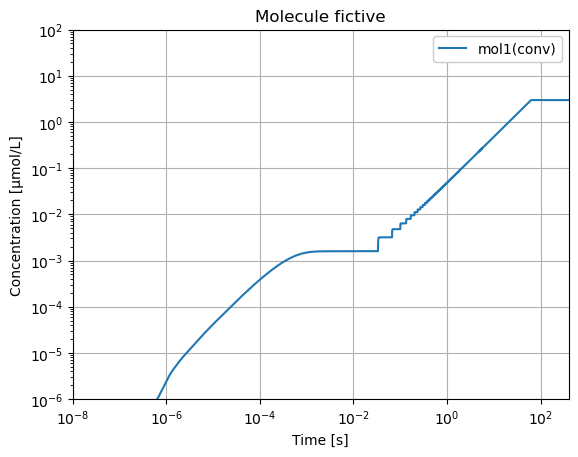

In [73]:
G_species = ["mol1"]
fig, ax = plt.subplots()
for label in G_species:
    ax.plot(df.index, df[label], label=label + "(conv)", marker="")


ax.set_ylim(bottom=1e-6, top=100)
ax.set_xlim([1e-8,400])
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("Time [s]")
ax.set_ylabel("Concentration [µmol/L]")
ax.legend(fancybox=True, framealpha=1)
ax.set_title("Molecule fictive")
ax.grid()

In [48]:
df["mol1"].iloc[-1] # Quantité de ROO_r en conv

2.96975456723446

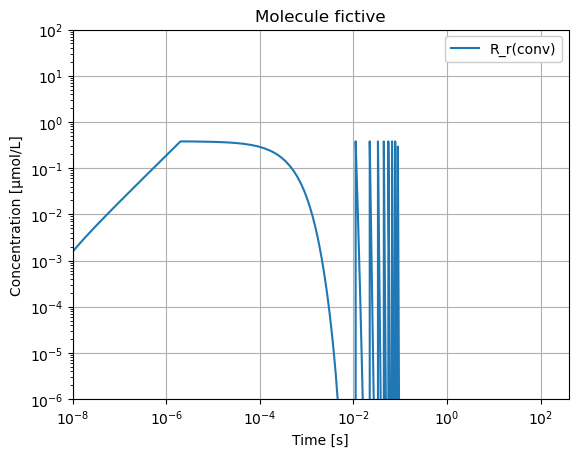

In [82]:
G_species = ["R_r"]
fig, ax = plt.subplots()
for label in G_species:
    ax.plot(df.index, df[label], label=label + "(conv)", marker="")


ax.set_ylim(bottom=1e-6, top=100)
ax.set_xlim([1e-8,400])
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("Time [s]")
ax.set_ylabel("Concentration [µmol/L]")
ax.legend(fancybox=True, framealpha=1)
ax.set_title("Molecule fictive")
ax.grid()

In [57]:
df["RR"].iloc[-1]

5.374485833989573e-05

#### O2

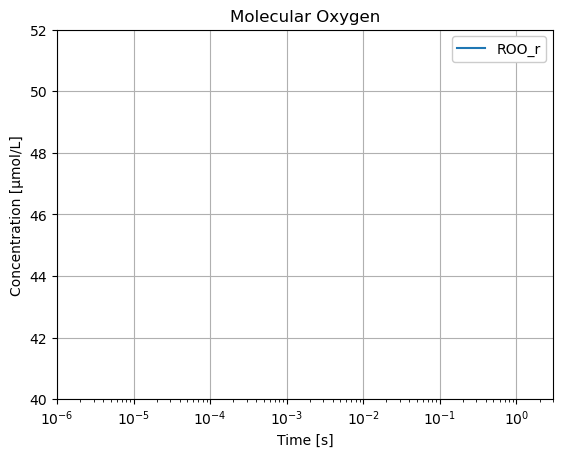

In [12]:
G_species = ["O2"]
fig, ax = plt.subplots()
for label in G_species:
    ax.plot(df.index, df[label], label=label, marker="")

ax.set_ylim(bottom=40, top=52)
ax.set_xlim([1e-6, 3])
ax.set_xscale("log")
ax.set_xlabel("Time [s]")
ax.set_ylabel("Concentration [µmol/L]")
ax.set_title("Molecular Oxygen")
ax.legend(fancybox=True, framealpha=1)
ax.grid()

#### Values of AUC (including AUC low and AUC high) for different beam structure 

In [75]:
#beam conv labo (en fctn du  débit de dose)
AUC_x = [0.03, 0.126, 0.14, 10, 1, 50, 100, 1000, 10000]
AUC_y = [61.97448412833437,58.25099468850181, 55.98657234991102,45.13203544074646, 47.44579399642899,44.67711829669291, 44.35049136942876, 43.15585985420986, 42.46269774285845]

In [48]:
# beam Nina Conv (en fctn de la dose)
AUC_x = [1,1.654,2,3,3.574,4,5,6,7,7.216,7.5,8,8.5,9,9.5,10,10.398,10.5,11,11.5,12,12.5,14,14.878,16,18,18.419,20]
AUC_y = [6.816098878999937,10.910200131085846,12.984784700499652, 18.750731752486704,21.921864723003555, 24.22028827238765, 29.502082227249332, 34.686579339089946, 39.746402189432274, 40.84085077941589, 42.274698846291734, 44.84156004205031,47.385809471496806, 49.91039207145343, 52.433708064465264, 54.95113435122659, 56.9424483384481, 57.453553642193846, 59.96492836738948, 62.48534313114447,65.02128866724098, 67.51511488245936, 75.10009166519741, 79.51197444225598, 85.23871439074674, 95.32257517388939, 97.42373031750556, 105.33416056766724]
AUC_low = 6.564700777449954
AUC_high = 193.88281400256988

Text(0, 0.5, 'NTCP')

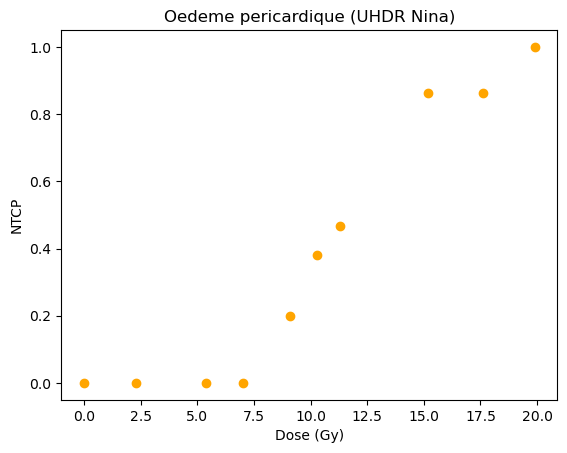

In [24]:
c = [0,2.3,5.4,7.0,9.1,10.3,11.3,15.2,17.6,19.9]
d = [0,0,0,0,0.20,0.382,0.467,0.864,0.864,1]
plt.plot(c, d, 'o', label='Nina point',c = 'orange')  

 
plt.title("Oedeme pericardique (UHDR Nina)")
plt.xlabel("Dose (Gy)")
plt.ylabel("NTCP")


In [55]:
file = Path(rf"configuration_Bordet.toml")
uc = rp.UnitCell.from_toml(file)
uc.set_beam("UHDR")
O2 = uc.env.species.get("O2")

PERIOD = 1200 # seconds


res = uc.prepare_chunked_run([1e-9, PERIOD],
                             max_step_size_on=1e-5,
                             max_step_size_off=0.5).run()


df_UHDR = res.to_pandas()

ser = df_UHDR["ROO_r"].to_numpy()
    
AUC_y.append((integrate.simpson(ser, df_UHDR.index)))
print(AUC_y)


2024-03-04 10:04:07,222::radiopyo::INFO::Loading config from file: configuration_Bordet.toml
2024-03-04 10:04:07,223::radiopyo::INFO::Resolving include: C:\Users\daraaoui\Desktop\Dev\radiopyo\radiopyo\radiopyo\radiopyo\data\config_Labarbe.toml
2024-03-04 10:04:07,224::radiopyo::INFO::Resolving include: C:\Users\daraaoui\Desktop\Dev\radiopyo\radiopyo\radiopyo\radiopyo\data\basic_water_radiolysis.toml
2024-03-04 10:04:07,316::radiopyo::INFO::Resolving include: C:\Users\daraaoui\Desktop\Dev\radiopyo\radiopyo\radiopyo\radiopyo\data\reactions_biology.toml
2024-03-04 10:04:07,334::radiopyo::WARNING::Unable to compute mass of GSH. Setting it to default mass, i.e. 0
2024-03-04 10:04:07,463::radiopyo::WARNING::Unable to compute mass of GSH. Setting it to default mass, i.e. 0
2024-03-04 10:04:07,572::radiopyo::INFO::File is loaded
2024-03-04 10:04:07,572::radiopyo::INFO::Beam configuration detected in config file
2024-03-04 10:04:07,572::radiopyo::INFO::BEAM:: Found beam 'conv' as pulsed -> {'do

  0%|          | 0/36 [00:00<?, ?it/s]

2024-03-04 10:04:09,298::radiopyo::INFO::Simulation done!
[14.382711627442042, 28.889977932401482, 34.99322937532645, 42.01055165665231, 45.61761420569036, 48.44165806187978, 58.13349025369999, 63.28457518377611, 67.77375102116689]


In [37]:
# beam Nina UHDR (en fctn de la dose)
AUC_x = [2.3,5.4,7.0,9.1,10.3,11.3,15.2,17.6,19.9]
AUC_y = [14.382711627442042, 28.889977932401482, 34.99322937532645, 42.01055165665231, 45.61761420569036, 48.44165806187978, 58.13349025369999, 63.28457518377611, 67.77375102116689]
#AUC_y = [0,0,0,0,20,38.2,46.7,86.4,86.4,100]
AUC_low = 6.564700777449954
AUC_high = 193.88281400256988


In [91]:
print(AUC_y)

[6.816098878999937, 10.910200131085846, 12.984784700499652, 18.750731752486704, 21.921864723003555, 24.22028827238765, 29.502082227249332, 34.686579339089946, 39.746402189432274, 40.84085077941589, 42.274698846291734, 44.84156004205031, 47.385809471496806, 49.91039207145343, 52.433708064465264, 54.95113435122659, 56.9424483384481, 57.453553642193846, 59.96492836738948, 62.48534313114447, 65.02128866724098, 67.51511488245936, 75.10009166519741, 79.51197444225598, 85.23871439074674, 95.32257517388939, 97.42373031750556, 105.33416056766724]


In [2]:
#Beam Labarbe con (en fctn du debit de dose)

AUC_x = [0.03,0.1,1,5,10,20, 30, 40, 50,60,70,80,90,1e2,200, 300, 400, 500,600,700,800,900,1e3,2000, 3000, 4000, 5000,6000,7000,8000,9000,1e4,1e5,1e6,1e7] # Débit de dose (Gy/s)
AUC_y = [65.2365025222376,58.144958826624304,46.777523517874315,44.75729171486023,44.480700874402785,44.33367934109567,44.28450504707478,44.25651380085663,44.24287696141527,44.23756301327218,44.22649633313222,44.215894831584436,44.217151756362306,44.20935921268307,44.180628468576934,44.15913400407609,44.14405316794805,44.12979464848568,44.11692855964534,44.103707658359326,44.09117311183242,44.07890927290556,44.06894560628432,43.95399535002546,43.85625604279862,43.76558058285963,43.68121980857103,43.60850380672044,43.545254581389834,43.485156118633945,43.43266432690035,43.391022304988105,42.6943448659332,42.57292618878062,42.53353664572294]
AUC_high = 193.88281400256988

AUC_low = 6.564700777449954

[0.00134209 0.0231985  0.0342737  0.06505527 0.0819844  0.09425457
 0.12245149 0.15012899 0.17714091 0.18298364 0.19063825 0.20434147
 0.21792398 0.23140149 0.24487225 0.25831156 0.26894221 0.27167075
 0.28507776 0.29853302 0.3120712  0.32538452 0.36587701 0.3894299
 0.42000217 0.47383498 0.48505202 0.52728195]
[0.04173654 0.11918376 0.15176604 0.1892281  0.20848445 0.22356064
 0.2753006  0.30279973 0.32676525]


(0.0, 1.2)

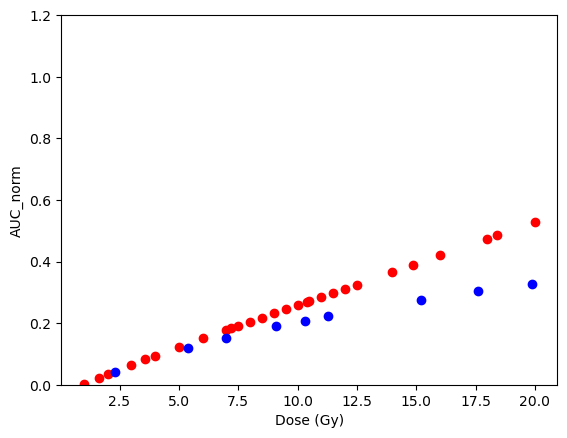

In [31]:
# X axis is the dose or the dose rate 
AUC_x = [1,1.654,2,3,3.574,4,5,6,7,7.216,7.5,8,8.5,9,9.5,10,10.398,10.5,11,11.5,12,12.5,14,14.878,16,18,18.419,20]
AUC_y = [6.816098878999937,10.910200131085846,12.984784700499652, 18.750731752486704,21.921864723003555, 24.22028827238765, 29.502082227249332, 34.686579339089946, 39.746402189432274, 40.84085077941589, 42.274698846291734, 44.84156004205031,47.385809471496806, 49.91039207145343, 52.433708064465264, 54.95113435122659, 56.9424483384481, 57.453553642193846, 59.96492836738948, 62.48534313114447,65.02128866724098, 67.51511488245936, 75.10009166519741, 79.51197444225598, 85.23871439074674, 95.32257517388939, 97.42373031750556, 105.33416056766724]
x = AUC_x
#Y axis is the normalised area-under-the-curve (AUC)
y = AUC_y
#high and low are the value for the normalisation


y_norm = []
 
for val in y:
    y_norm.append((val - AUC_low)/(AUC_high - AUC_low))
y_norm    
x = np.asarray(x)
y_norm = np.asarray(y_norm)
print(y_norm)


plt.xlabel("Dose (Gy)")
plt.ylabel("AUC_norm")
plt.plot(x, y_norm, 'o', label='data',c = "red")
plt.ylim(0,1.2)


AUC_x = [2.3,5.4,7.0,9.1,10.3,11.3,15.2,17.6,19.9]
AUC_y = [14.382711627442042, 28.889977932401482, 34.99322937532645, 42.01055165665231, 45.61761420569036, 48.44165806187978, 58.13349025369999, 63.28457518377611, 67.77375102116689]
x = AUC_x
#Y axis is the normalised area-under-the-curve (AUC)
y = AUC_y
#high and low are the value for the normalisation


y_norm = []
 
for val in y:
    y_norm.append((val - AUC_low)/(AUC_high - AUC_low))
y_norm    
x = np.asarray(x)
y_norm = np.asarray(y_norm)
print(y_norm)


 

plt.xlabel("Dose (Gy)")
plt.ylabel("AUC_norm")
plt.plot(x, y_norm, 'o', label='data',c = "blue")
plt.ylim(0,1.2)

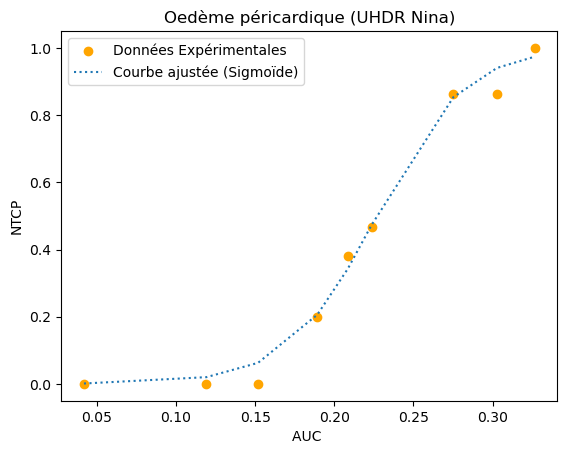

Paramètre gamma ajusté : 36.17360772670645
Paramètre AUC50 ajusté : 0.22653403628949817


In [28]:
import numpy as np

import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

# Définir la fonction sigmoïde avec des noms de paramètres modifiés
def sigmoid(x, gamma, AUC50):
    return 1 / (1 + np.exp(-gamma * (x - AUC50)))
# Générer des données expérimentales simulées



#x_data = np.array([0,1.654,3.574,7.216,10.398,14.878,18.419])
#y_data = np.array([0, 0.017, 0.016, 0.446, 0.7959999999999999, 0.95, 1.0])

x_data = np.array([0.04173654, 0.11918376 ,0.15176604 ,0.1892281,  0.20848445, 0.22356064,
 0.2753006 , 0.30279973 ,0.32676525])
y_data = np.array([0,0,0,0.20,0.382,0.467,0.864,0.864,1])


# Ajuster la courbe sigmoïde aux données expérimentales
params, covariance = curve_fit(sigmoid, x_data, y_data)

# Obtenir les paramètres ajustés
gamma_fit, AUC50_fit = params

# Générer des valeurs prédites avec les paramètres ajustés
y_fit = sigmoid(x_data, gamma_fit, AUC50_fit)

# Tracer les données expérimentales et la courbe ajustée
plt.scatter(x_data, y_data, label='Données Expérimentales',c = 'orange')
plt.plot(x_data, y_fit, label='Courbe ajustée (Sigmoïde)',linestyle=":")
plt.legend()

 
plt.title("Oedème péricardique (UHDR Nina)")
plt.xlabel("AUC ")
plt.ylabel("NTCP")

# Afficher le graphique
plt.show()

 
# Afficher les paramètres ajustés
print(f"Paramètre gamma ajusté : {gamma_fit}")
print(f"Paramètre AUC50 ajusté : {AUC50_fit}")

0.0012482147412816304
0.020168734635197846
0.06270081396419025
0.20595372003874576
0.3423321104022839
0.4731362761322268
0.8537177480239515
0.940408720568164
0.974060957870929
0.0065483014616466865
0.010652833796005814
0.01361951247420291
0.02682123343191518
0.03874455887865022
0.05041493977152877
0.09090717262581736
0.15694430352391436
0.25452538852225026
0.28020825960715795
0.3161431971910932
0.3860697360099069
0.460362385515534
0.5358727961763661
0.6097373533498774
0.6787367589096822
0.7284299896213312
0.7403787034843103
0.7939622607801182
0.8390395262167597
0.8759998419276498
0.9049965827990251
0.959426880804391
0.9756858754274259
0.9876118357934853
0.9962688541870752
0.9970971855871432
0.9988733638539435


Text(0, 0.5, 'NTCP')

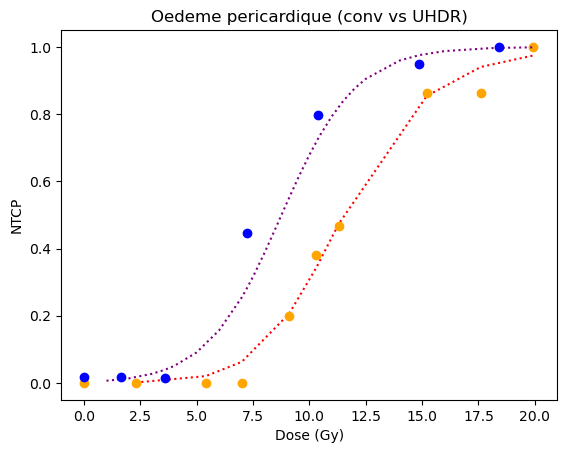

In [79]:
AUC50 = 0.225
gamma = 22.453843847070782



AUC50 = 0.22653403628949817
gamma = 36.17360772670645

# beam Nina UHDR (en fctn de la dose)
AUC_x = [2.3,5.4,7.0,9.1,10.3,11.3,15.2,17.6,19.9]
AUC_y = [14.382711627442042, 28.889977932401482, 34.99322937532645, 42.01055165665231, 45.61761420569036, 48.44165806187978, 58.13349025369999, 63.28457518377611, 67.77375102116689]
#AUC_y = [0,0,0,0,20,38.2,46.7,86.4,86.4,100]
AUC_low = 6.564700777449954
AUC_high = 193.88281400256988


# X axis is the dose or the dose rate 
x = AUC_x
#Y axis is the normalised area-under-the-curve (AUC)
y = AUC_y
#high and low are the value for the normalisation


y_norm = []
 
for val in y:
    y_norm.append((val - AUC_low)/(AUC_high - AUC_low))
y_norm    
x = np.asarray(x)
y_norm = np.asarray(y_norm)




NTCP_model = []
for i in range (len(AUC_x)):
    NTCP = 1/(1 + np.exp(-gamma * (y_norm[i] - AUC50)))
    NTCP_model.append(NTCP)
    print(NTCP)

plt.plot(x, NTCP_model, label='data',linestyle=":",c = 'red')  
    

c = [0,2.3,5.4,7.0,9.1,10.3,11.3,15.2,17.6,19.9]
d = [0,0,0,0,0.20,0.382,0.467,0.864,0.864,1]
plt.plot(c, d, 'o', label='Nina point',c = 'orange')  
 
    
AUC50 = 0.225
gamma = 22.453843847070782    
# beam Nina Conv (en fctn de la dose)
AUC_x = [1,1.654,2,3,3.574,4,5,6,7,7.216,7.5,8,8.5,9,9.5,10,10.398,10.5,11,11.5,12,12.5,14,14.878,16,18,18.419,20]
AUC_y = [6.816098878999937,10.910200131085846,12.984784700499652, 18.750731752486704,21.921864723003555, 24.22028827238765, 29.502082227249332, 34.686579339089946, 39.746402189432274, 40.84085077941589, 42.274698846291734, 44.84156004205031,47.385809471496806, 49.91039207145343, 52.433708064465264, 54.95113435122659, 56.9424483384481, 57.453553642193846, 59.96492836738948, 62.48534313114447,65.02128866724098, 67.51511488245936, 75.10009166519741, 79.51197444225598, 85.23871439074674, 95.32257517388939, 97.42373031750556, 105.33416056766724]
AUC_low = 6.564700777449954
AUC_high = 193.88281400256988    

# X axis is the dose or the dose rate 
x = AUC_x
#Y axis is the normalised area-under-the-curve (AUC)
y = AUC_y
#high and low are the value for the normalisation


y_norm = []
 
for val in y:
    y_norm.append((val - AUC_low)/(AUC_high - AUC_low))
y_norm    
x = np.asarray(x)
y_norm = np.asarray(y_norm)


NTCP_model = []
for i in range (len(AUC_x)):
    NTCP = 1/(1 + np.exp(-gamma * (y_norm[i] - AUC50)))
    NTCP_model.append(NTCP)
    print(NTCP)

plt.plot(x, NTCP_model, label='data',linestyle=":",c = 'purple')  
    
e = [0,1.654,3.574,7.216,10.398,14.878,18.419]
f = [0.017, 0.017, 0.016, 0.446, 0.7959999999999999, 0.95, 1.0]
plt.plot(e, f, 'o',c = 'blue')  

    

plt.title("Oedeme pericardique (conv vs UHDR)")
plt.xlabel("Dose (Gy)")
plt.ylabel("NTCP")

0.013844075402534373
0.022015434136354338
0.02780147582861239
0.05267825846315149
0.0742145254102485
0.09461140457638362
0.16119104600867035
0.2589522795251481
0.38513010257893876
0.4154214603717124
0.4560586852479028
0.5299236292991418
0.6018758536531901
0.669177765799628
0.7301736406728833
0.783445556391886
0.8198799716004351
0.8284219775431019
0.8657790518082864
0.8961204676407305
0.9203663314817113
0.93905880167742
0.9736557443219863
0.9839941697964384
0.9916671319569154
0.9973807273322598
0.9979432712866521
0.9991730639144896


Text(0, 0.5, 'NTCP')

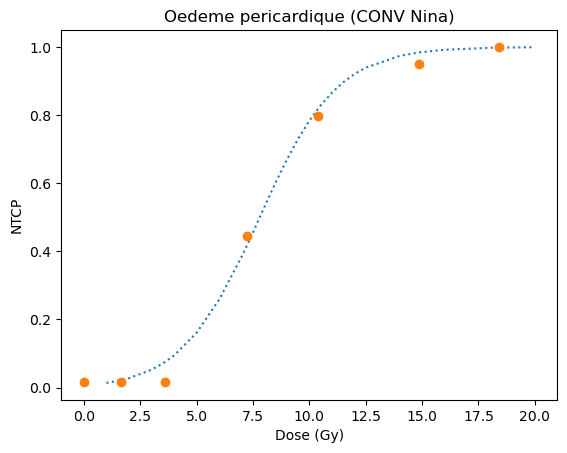

In [116]:
AUC50 = 0.225
gamma = 22.453843847070782

NTCP_model = []
for i in range (len(AUC_x)):
    NTCP = 1/(1 + np.exp(-gamma * (y_norm[i] - AUC50)))
    NTCP_model.append(NTCP)
    print(NTCP)

plt.plot(x, NTCP_model, label='data',linestyle=":")  
    
c = [0,1.654,3.574,7.216,10.398,14.878,18.419]
d = [0.017, 0.017, 0.016, 0.446, 0.7959999999999999, 0.95, 1.0]
plt.plot(c, d, 'o', label='Nina point')  

 
plt.title("Oedeme pericardique (CONV Nina)")
plt.xlabel("Dose (Gy)")
plt.ylabel("NTCP")

0.05127992062761803
0.06479906014996106
0.07285572811994637
0.10030220248835031
0.11904411391238066
0.13445924970796885
0.17628758638437456
0.22666867393017773
0.2848979387304878
0.2986141107359466
0.3171435294260705
0.351779368073069
0.3877226187365981
0.4246394329436759
0.4623974820204938
0.5005025087491286
0.5306617803486008
0.538375470310689
0.5759432686942039
0.612783525616967
0.6485919796623626
0.6822494923966971
0.7728064343170025
0.8163553012081296
0.8628570548586293
0.9206274221619165
0.9294555849363951
0.9551350353504904


Text(0, 0.5, 'NTCP')

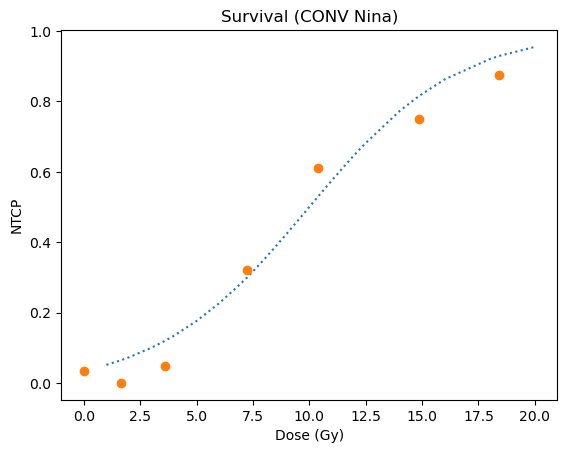

In [157]:
AUC50 = 0.282096578575292
gamma = 11.808978648178869

NTCP_model = []
for i in range (len(AUC_x)):
    NTCP = 1/(1 + np.exp(-gamma * (y_norm[i] - AUC50)))
    NTCP_model.append(NTCP)
    print(NTCP)

plt.plot(x, NTCP_model, label='data',linestyle=":")    
    
c = [0,1.654,3.574,7.216,10.398,14.878,18.419]
d = [0.032999999999999974,0,0.04799999999999997,0.32099999999999995,0.612,0.75,0.875]
plt.plot(c, d, 'o', label='Nina point')   
 
plt.title("Survival (CONV Nina)")
plt.xlabel("Dose (Gy)")
plt.ylabel("NTCP")

0.06336816580254091
0.09346366453244538
0.11318727700578067
0.18765925864131425
0.2425054260226883
0.2885387326392036
0.4111988855369933
0.5435040153277488
0.6670998728990942
0.6916218597302829
0.7221699923769865
0.7719532179311944
0.8147490138088519
0.8508064522989016
0.8808581290380504
0.9054768512236531
0.9216165883440605
0.925332493764492
0.9413385889817534
0.9541245290804802
0.9642846010857176
0.9721428072097797
0.9870405012544154
0.9917302846580706
0.9953955402528866
0.998363753494949
0.9986814656909672
0.9994153274836706


Text(0, 0.5, 'NTCP')

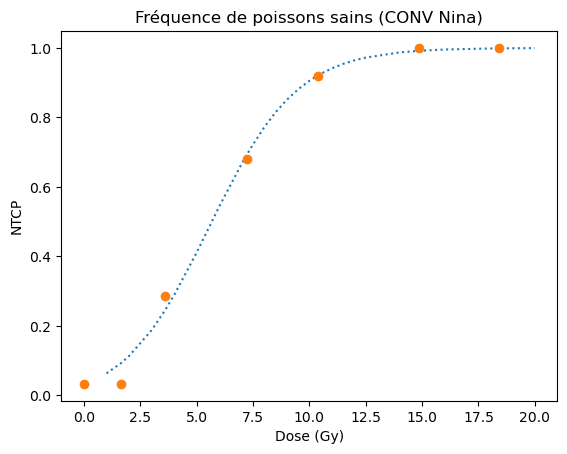

In [135]:
AUC50 = 0.16946508079245426
gamma = 20.031761413692834 

NTCP_model = []
for i in range (len(AUC_x)):
    NTCP = 1/(1 + np.exp(-gamma * (y_norm[i] - AUC50)))
    NTCP_model.append(NTCP)
    print(NTCP)

plt.plot(x, NTCP_model, label='data',linestyle=":")  
    
c = [0,1.654,3.574,7.216,10.398,14.878,18.419]
d = [0.032999999999999974,0.032999999999999974,0.2859999999999999,0.679,0.9179999999999999,1,1]
plt.plot(c, d, 'o', label='Nina point')   
 
plt.title("Fréquence de poissons sains (CONV Nina)")
plt.xlabel("Dose (Gy)")
plt.ylabel("NTCP")


In [44]:
df_r = res.reconstruct_reactions()

 

#fig_man.set_brewer_map("Dark2","qualitative",8,reverse = True)

species = "ROO_r"

fig, ax = plt.subplots(figsize=(10, 6))

for reaction in res.env.reactions_involving_reactant(species):

    ax.semilogx(df_r.index, df_r[reaction.as_label()], label=f"{reaction}", marker="", linestyle=":")

for reaction in res.env.reactions_involving_product(species):

    ax.semilogx(df_r.index, df_r[reaction.as_label()], label=f"{reaction}", marker="", linestyle="--")

                    
ax.set_yscale("log")
ax.set_ylim([1e-15,1])
ax.spines['top'].set_linewidth(2.0)
ax.spines['right'].set_linewidth(2.0)
ax.spines['bottom'].set_linewidth(2.0)
ax.spines['left'].set_linewidth(2.0)
ax.set_xlabel("times")
ax.set_ylabel("Reaction rate")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title("Reaction with ROO_r")                   
#fig2, ax2 = RPlot.set_legend_separate_plot(fig,ax)
ax.grid('on')  

NameError: name 'res' is not defined

In [6]:
file = Path(rf"configuration_Bordet.toml")
uc = rp.UnitCell.from_toml(file)
uc.set_beam("conv")
O2 = uc.env.species.get("O2")
PULSES_NUMBER = 3
PERIOD = 1200 # seconds

2024-02-26 10:10:01,033::radiopyo::INFO::Loading config from file: configuration_Bordet.toml
2024-02-26 10:10:01,035::radiopyo::INFO::Resolving include: C:\Users\daraaoui\Desktop\Dev\radiopyo\radiopyo\radiopyo\radiopyo\data\config_Labarbe.toml
2024-02-26 10:10:01,035::radiopyo::INFO::Resolving include: C:\Users\daraaoui\Desktop\Dev\radiopyo\radiopyo\radiopyo\radiopyo\data\basic_water_radiolysis.toml
2024-02-26 10:10:01,125::radiopyo::INFO::Resolving include: C:\Users\daraaoui\Desktop\Dev\radiopyo\radiopyo\radiopyo\radiopyo\data\reactions_biology.toml
2024-02-26 10:10:01,140::radiopyo::WARNING::Unable to compute mass of GSH. Setting it to default mass, i.e. 0
2024-02-26 10:10:01,266::radiopyo::WARNING::Unable to compute mass of GSH. Setting it to default mass, i.e. 0
2024-02-26 10:10:01,384::radiopyo::INFO::File is loaded
2024-02-26 10:10:01,384::radiopyo::INFO::Beam configuration detected in config file
2024-02-26 10:10:01,384::radiopyo::INFO::BEAM:: Found beam 'conv' as pulsed -> {'do

In [146]:
n_pulse = [1,2,3,4,5,6,7,8,9]
AUC_y = []
sims = dict()
for idx, value in enumerate(max_dose):
    print(f"Simulating conv: {value} Gy")
    uc.beam_list.current.update_beam_param(max_dose=value)
    sim = uc.prepare_chunked_run([1e-9, PERIOD],
                             max_step_size_on=1e-5,
                             max_step_size_off=0.5)
    res = sim.run()
    sims[value] = res.to_pandas()
    
    
    #ser = sims[value]["ROO_r"].to_numpy()
    #AUC_y.append((integrate.simpson(ser, sims[value].index)))

Simulating conv: 1 Gy
2023-11-23 11:51:36,102::radiopyo::INFO::Simulation divided in 376 chunks
2023-11-23 11:51:36,103::radiopyo::INFO::Running all simulation chunks


  0%|          | 0/376 [00:00<?, ?it/s]

2023-11-23 11:51:45,096::radiopyo::INFO::Simulation done!
Simulating conv: 1.654 Gy
2023-11-23 11:51:45,118::radiopyo::INFO::Simulation divided in 622 chunks
2023-11-23 11:51:45,118::radiopyo::INFO::Running all simulation chunks


  0%|          | 0/622 [00:00<?, ?it/s]

2023-11-23 11:52:00,052::radiopyo::INFO::Simulation done!
Simulating conv: 2 Gy
2023-11-23 11:52:00,081::radiopyo::INFO::Simulation divided in 750 chunks
2023-11-23 11:52:00,083::radiopyo::INFO::Running all simulation chunks


  0%|          | 0/750 [00:00<?, ?it/s]

2023-11-23 11:52:17,773::radiopyo::INFO::Simulation done!
Simulating conv: 3 Gy
2023-11-23 11:52:17,805::radiopyo::INFO::Simulation divided in 1126 chunks
2023-11-23 11:52:17,805::radiopyo::INFO::Running all simulation chunks


  0%|          | 0/1126 [00:00<?, ?it/s]

2023-11-23 11:52:45,535::radiopyo::INFO::Simulation done!
Simulating conv: 3.574 Gy
2023-11-23 11:52:45,579::radiopyo::INFO::Simulation divided in 1342 chunks
2023-11-23 11:52:45,581::radiopyo::INFO::Running all simulation chunks


  0%|          | 0/1342 [00:00<?, ?it/s]

2023-11-23 11:53:18,962::radiopyo::INFO::Simulation done!
Simulating conv: 4 Gy
2023-11-23 11:53:19,023::radiopyo::INFO::Simulation divided in 1500 chunks
2023-11-23 11:53:19,024::radiopyo::INFO::Running all simulation chunks


  0%|          | 0/1500 [00:00<?, ?it/s]

2023-11-23 11:53:56,774::radiopyo::INFO::Simulation done!
Simulating conv: 5 Gy
2023-11-23 11:53:56,849::radiopyo::INFO::Simulation divided in 1876 chunks
2023-11-23 11:53:56,849::radiopyo::INFO::Running all simulation chunks


  0%|          | 0/1876 [00:00<?, ?it/s]

2023-11-23 11:54:45,371::radiopyo::INFO::Simulation done!
Simulating conv: 6 Gy
2023-11-23 11:54:45,460::radiopyo::INFO::Simulation divided in 2250 chunks
2023-11-23 11:54:45,460::radiopyo::INFO::Running all simulation chunks


  0%|          | 0/2250 [00:00<?, ?it/s]

2023-11-23 11:55:45,163::radiopyo::INFO::Simulation done!
Simulating conv: 7 Gy
2023-11-23 11:55:45,270::radiopyo::INFO::Simulation divided in 2626 chunks
2023-11-23 11:55:45,270::radiopyo::INFO::Running all simulation chunks


  0%|          | 0/2626 [00:00<?, ?it/s]

2023-11-23 11:56:57,255::radiopyo::INFO::Simulation done!
Simulating conv: 7.216 Gy
2023-11-23 11:56:57,376::radiopyo::INFO::Simulation divided in 2706 chunks
2023-11-23 11:56:57,376::radiopyo::INFO::Running all simulation chunks


  0%|          | 0/2706 [00:00<?, ?it/s]

2023-11-23 11:58:12,782::radiopyo::INFO::Simulation done!
Simulating conv: 7.5 Gy
2023-11-23 11:58:12,940::radiopyo::INFO::Simulation divided in 2814 chunks
2023-11-23 11:58:12,941::radiopyo::INFO::Running all simulation chunks


  0%|          | 0/2814 [00:00<?, ?it/s]

2023-11-23 11:59:32,742::radiopyo::INFO::Simulation done!
Simulating conv: 8 Gy
2023-11-23 11:59:32,890::radiopyo::INFO::Simulation divided in 3000 chunks
2023-11-23 11:59:32,892::radiopyo::INFO::Running all simulation chunks


  0%|          | 0/3000 [00:00<?, ?it/s]

2023-11-23 12:01:00,265::radiopyo::INFO::Simulation done!
Simulating conv: 8.5 Gy
2023-11-23 12:01:00,421::radiopyo::INFO::Simulation divided in 3188 chunks
2023-11-23 12:01:00,422::radiopyo::INFO::Running all simulation chunks


  0%|          | 0/3188 [00:00<?, ?it/s]

2023-11-23 12:02:34,142::radiopyo::INFO::Simulation done!
Simulating conv: 9 Gy
2023-11-23 12:02:34,302::radiopyo::INFO::Simulation divided in 3376 chunks
2023-11-23 12:02:34,302::radiopyo::INFO::Running all simulation chunks


  0%|          | 0/3376 [00:00<?, ?it/s]

2023-11-23 12:04:14,210::radiopyo::INFO::Simulation done!
Simulating conv: 9.5 Gy
2023-11-23 12:04:14,376::radiopyo::INFO::Simulation divided in 3564 chunks
2023-11-23 12:04:14,376::radiopyo::INFO::Running all simulation chunks


  0%|          | 0/3564 [00:00<?, ?it/s]

2023-11-23 12:06:01,490::radiopyo::INFO::Simulation done!
Simulating conv: 10 Gy
2023-11-23 12:06:01,659::radiopyo::INFO::Simulation divided in 3750 chunks
2023-11-23 12:06:01,659::radiopyo::INFO::Running all simulation chunks


  0%|          | 0/3750 [00:00<?, ?it/s]

2023-11-23 12:07:53,627::radiopyo::INFO::Simulation done!
Simulating conv: 10.398 Gy
2023-11-23 12:07:53,815::radiopyo::INFO::Simulation divided in 3900 chunks
2023-11-23 12:07:53,815::radiopyo::INFO::Running all simulation chunks


  0%|          | 0/3900 [00:00<?, ?it/s]

2023-11-23 12:09:51,115::radiopyo::INFO::Simulation done!
Simulating conv: 10.5 Gy
2023-11-23 12:09:51,302::radiopyo::INFO::Simulation divided in 3938 chunks
2023-11-23 12:09:51,302::radiopyo::INFO::Running all simulation chunks


  0%|          | 0/3938 [00:00<?, ?it/s]

2023-11-23 12:11:46,484::radiopyo::INFO::Simulation done!
Simulating conv: 11 Gy
2023-11-23 12:11:46,672::radiopyo::INFO::Simulation divided in 4126 chunks
2023-11-23 12:11:46,672::radiopyo::INFO::Running all simulation chunks


  0%|          | 0/4126 [00:00<?, ?it/s]

2023-11-23 12:13:51,227::radiopyo::INFO::Simulation done!
Simulating conv: 11.5 Gy
2023-11-23 12:13:51,422::radiopyo::INFO::Simulation divided in 4314 chunks
2023-11-23 12:13:51,430::radiopyo::INFO::Running all simulation chunks


  0%|          | 0/4314 [00:00<?, ?it/s]

2023-11-23 12:16:04,055::radiopyo::INFO::Simulation done!
Simulating conv: 12 Gy
2023-11-23 12:16:04,265::radiopyo::INFO::Simulation divided in 4500 chunks
2023-11-23 12:16:04,265::radiopyo::INFO::Running all simulation chunks


  0%|          | 0/4500 [00:00<?, ?it/s]

2023-11-23 12:18:24,924::radiopyo::INFO::Simulation done!
Simulating conv: 12.5 Gy
2023-11-23 12:18:25,125::radiopyo::INFO::Simulation divided in 4688 chunks
2023-11-23 12:18:25,125::radiopyo::INFO::Running all simulation chunks


  0%|          | 0/4688 [00:00<?, ?it/s]

2023-11-23 12:20:54,070::radiopyo::INFO::Simulation done!
Simulating conv: 14 Gy
2023-11-23 12:20:54,292::radiopyo::INFO::Simulation divided in 5250 chunks
2023-11-23 12:20:54,292::radiopyo::INFO::Running all simulation chunks


  0%|          | 0/5250 [00:00<?, ?it/s]

2023-11-23 12:23:45,773::radiopyo::INFO::Simulation done!
Simulating conv: 14.878 Gy
2023-11-23 12:23:45,999::radiopyo::INFO::Simulation divided in 5580 chunks
2023-11-23 12:23:45,999::radiopyo::INFO::Running all simulation chunks


  0%|          | 0/5580 [00:00<?, ?it/s]

2023-11-23 12:26:46,222::radiopyo::INFO::Simulation done!
Simulating conv: 16 Gy
2023-11-23 12:26:46,451::radiopyo::INFO::Simulation divided in 6000 chunks
2023-11-23 12:26:46,451::radiopyo::INFO::Running all simulation chunks


  0%|          | 0/6000 [00:00<?, ?it/s]

2023-11-23 12:30:05,696::radiopyo::INFO::Simulation done!
Simulating conv: 18 Gy
2023-11-23 12:30:05,960::radiopyo::INFO::Simulation divided in 6750 chunks
2023-11-23 12:30:05,960::radiopyo::INFO::Running all simulation chunks


  0%|          | 0/6750 [00:00<?, ?it/s]

2023-11-23 12:33:59,171::radiopyo::INFO::Simulation done!
Simulating conv: 18.419 Gy
2023-11-23 12:33:59,459::radiopyo::INFO::Simulation divided in 6908 chunks
2023-11-23 12:33:59,459::radiopyo::INFO::Running all simulation chunks


  0%|          | 0/6908 [00:00<?, ?it/s]

2023-11-23 12:38:09,244::radiopyo::INFO::Simulation done!
Simulating conv: 20 Gy
2023-11-23 12:38:09,597::radiopyo::INFO::Simulation divided in 7500 chunks
2023-11-23 12:38:09,597::radiopyo::INFO::Running all simulation chunks


  0%|          | 0/7500 [00:00<?, ?it/s]

2023-11-23 12:42:58,880::radiopyo::INFO::Simulation done!


In [147]:
AUC_y

[6.816098878999937,
 10.910200131085846,
 12.984784700499652,
 18.750731752486704,
 21.921864723003555,
 24.22028827238765,
 29.502082227249332,
 34.686579339089946,
 39.746402189432274,
 40.84085077941589,
 42.274698846291734,
 44.84156004205031,
 47.385809471496806,
 49.91039207145343,
 52.433708064465264,
 54.95113435122659,
 56.9424483384481,
 57.453553642193846,
 59.96492836738948,
 62.48534313114447,
 65.02128866724098,
 67.51511488245936,
 75.10009166519741,
 79.51197444225598,
 85.23871439074674,
 95.32257517388939,
 97.42373031750556,
 105.33416056766724]

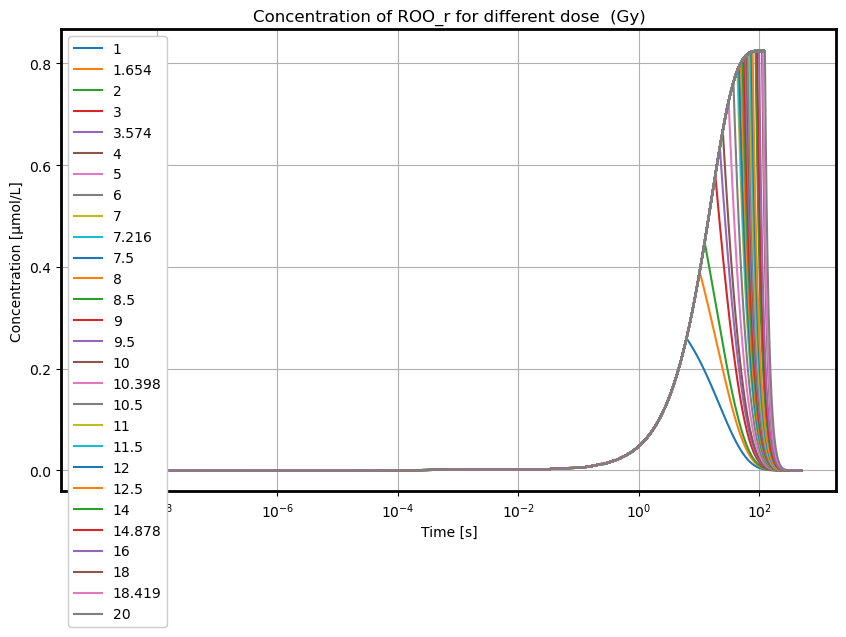

In [173]:
species = "ROO_r"

fig, ax = plt.subplots(figsize=(10, 6))
for value, df in sims.items():
    ax.plot(df.index, df[species], label=value, marker="")
    #ax.set_ylim(bottom=1e-6, top=2)
    #ax.set_xlim([1e-6, RIGHT_LIMIT])

    #ax.set_xlim([0, 100])
ax.set_xscale("log")
#ax.set_yscale("log")
ax.spines['top'].set_linewidth(2.0)
ax.spines['right'].set_linewidth(2.0)
ax.spines['bottom'].set_linewidth(2.0)
ax.spines['left'].set_linewidth(2.0)
ax.set_xlabel("Time [s]")
ax.set_ylabel("Concentration [µmol/L]")
ax.legend(fancybox=True, framealpha=1)
    #ax.legend(fancybox=True, framealpha=1)
ax.set_title("Concentration of ROO_r for different dose  (Gy)")
ax.grid('on')      

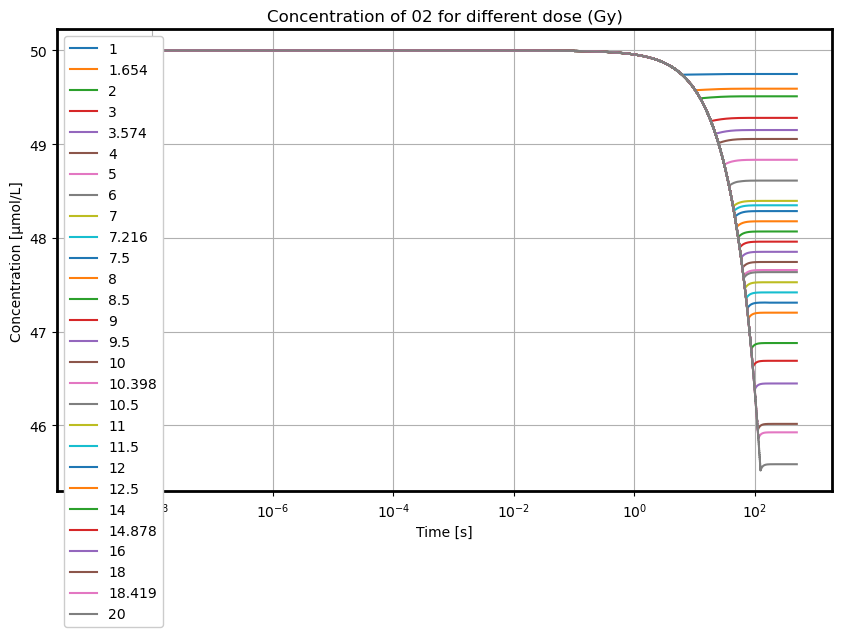

In [174]:
species = "O2"
fig, ax = plt.subplots(figsize=(10, 6))
for value, df in sims.items():
    ax.plot(df.index, df[species], label=value, marker="")
 
ax.set_xscale("log")
#ax.set_yscale("log")
ax.spines['top'].set_linewidth(2.0)
ax.spines['right'].set_linewidth(2.0)
ax.spines['bottom'].set_linewidth(2.0)
ax.spines['left'].set_linewidth(2.0)
ax.set_xlabel("Time [s]")
ax.set_ylabel("Concentration [µmol/L]")
ax.legend(fancybox=True, framealpha=1)
    #ax.legend(fancybox=True, framealpha=1)
ax.set_title("Concentration of 02 for different dose (Gy)")

ax.grid('on')  

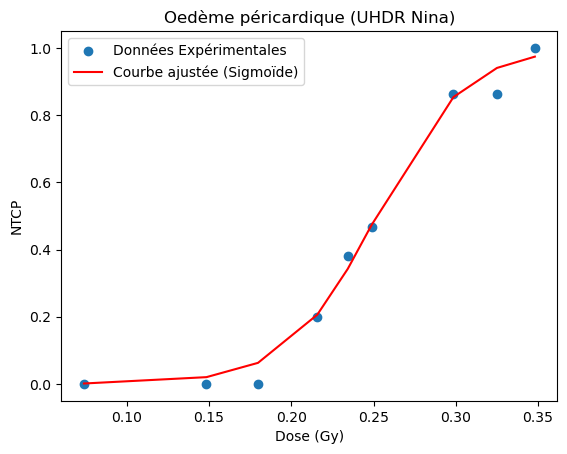

Paramètre gamma ajusté : 37.59490717974461
Paramètre AUC50 ajusté : 0.2516906335907438


In [95]:
import numpy as np

import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

# Définir la fonction sigmoïde avec des noms de paramètres modifiés
def sigmoid(x, gamma, AUC50):
    return 1 / (1 + np.exp(-gamma * (x - AUC50)))
# Générer des données expérimentales simulées



#x_data = np.array([0,1.654,3.574,7.216,10.398,14.878,18.419])
#y_data = np.array([0, 0.017, 0.016, 0.446, 0.7959999999999999, 0.95, 1.0])

x_data = np.array([0.07387949 ,0.14839878 ,0.17974928 ,0.21579506, 0.23432342, 0.24882965
 ,0.29861356, 0.32507307, 0.34813256])
y_data = np.array([0,0,0,0.20,0.382,0.467,0.864,0.864,1])


# Ajuster la courbe sigmoïde aux données expérimentales
params, covariance = curve_fit(sigmoid, x_data, y_data)

# Obtenir les paramètres ajustés
gamma_fit, AUC50_fit = params

# Générer des valeurs prédites avec les paramètres ajustés
y_fit = sigmoid(x_data, gamma_fit, AUC50_fit)

# Tracer les données expérimentales et la courbe ajustée
plt.scatter(x_data, y_data, label='Données Expérimentales')
plt.plot(x_data, y_fit, label='Courbe ajustée (Sigmoïde)', color='red')
plt.legend()

 
plt.title("Oedème péricardique (UHDR Nina)")
plt.xlabel("Dose (Gy)")
plt.ylabel("NTCP")

# Afficher le graphique
plt.show()

 
# Afficher les paramètres ajustés
print(f"Paramètre gamma ajusté : {gamma_fit}")
print(f"Paramètre AUC50 ajusté : {AUC50_fit}")

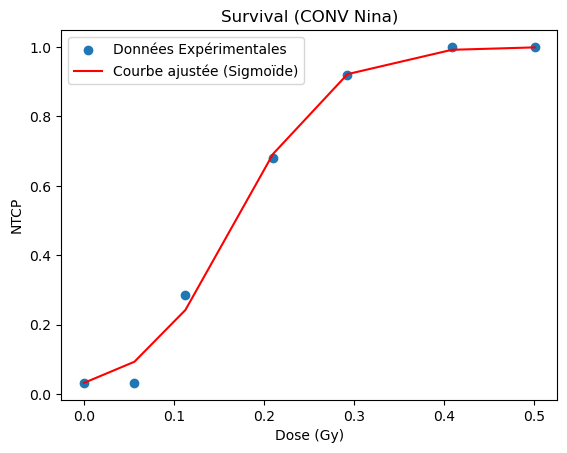

Paramètre gamma ajusté : 20.031761413692834
Paramètre AUC50 ajusté : 0.16946508079245426


In [147]:
import numpy as np

import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

# Définir la fonction sigmoïde avec des noms de paramètres modifiés
def sigmoid(x, gamma, AUC50):
    return 1 / (1 + np.exp(-gamma * (x - AUC50)))
# Générer des données expérimentales simulées
x_data = np.array([0,0.05604228588276973,0.11260576296758522,0.20978667738222032,0.2924955482306583,0.40842814515382314,0.500435233141421])
y_data = np.array([0.032999999999999974,0.032999999999999974,0.2859999999999999,0.679,0.9179999999999999,1,1])

# Ajuster la courbe sigmoïde aux données expérimentales
params, covariance = curve_fit(sigmoid, x_data, y_data)

# Obtenir les paramètres ajustés
gamma_fit, AUC50_fit = params

# Générer des valeurs prédites avec les paramètres ajustés
y_fit = sigmoid(x_data, gamma_fit, AUC50_fit)

# Tracer les données expérimentales et la courbe ajustée
plt.scatter(x_data, y_data, label='Données Expérimentales')
plt.plot(x_data, y_fit, label='Courbe ajustée (Sigmoïde)', color='red')
plt.legend()

 
plt.title("Survival (CONV Nina)")
plt.xlabel("Dose (Gy)")
plt.ylabel("NTCP")

# Afficher le graphique
plt.show()

 
# Afficher les paramètres ajustés
print(f"Paramètre gamma ajusté : {gamma_fit}")
print(f"Paramètre AUC50 ajusté : {AUC50_fit}")

In [36]:
d = {0: 'a', 22: 3, 2: 'c', 3: 'd'} 

In [50]:
AUC_x = [1,1.654,2,3,3.574,4,5,6,7,7.216,7.5,8,8.5,9,9.5,10,10.398,10.5,11,11.5,12,12.5,14,14.878,16,18,18.419,20]
AUC_y = [6.816098878999937,10.910200131085846,12.984784700499652, 18.750731752486704,21.921864723003555, 24.22028827238765, 29.502082227249332, 34.686579339089946, 39.746402189432274, 40.84085077941589, 42.274698846291734, 44.84156004205031,47.385809471496806, 49.91039207145343, 52.433708064465264, 54.95113435122659, 56.9424483384481, 57.453553642193846, 59.96492836738948, 62.48534313114447,65.02128866724098, 67.51511488245936, 75.10009166519741, 79.51197444225598, 85.23871439074674, 95.32257517388939, 97.42373031750556, 105.33416056766724]

In [108]:
a = [0,1.654,3.574,7.216,10.398,14.878,18.419]
b = [0,0.05604228588276973,0.11260576296758522,0.20978667738222032,0.2924955482306583,0.40842814515382314,0.500435233141421]

In [106]:
AUC_x[26]

18.419

In [107]:
y_norm[26]

0.500435233141421

In [131]:
a = [0.032999999999999974,0.032999999999999974,0.2859999999999999,0.679,0.9179999999999999,1,1]
